In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from collections import OrderedDict
from manifold_helper import unpickle, ManifoldHelper
from sklearn.utils import shuffle

def plot_images(data, n_img_per_row=10, cmap='gray'):
    shape = int(np.sqrt(len(data[0])))
    # plot iage of the digits
    img = np.zeros( (shape * n_img_per_row, shape * n_img_per_row) )
    for i in range( n_img_per_row ):
        ix = shape * i
        for j in range( n_img_per_row ):
            iy = shape * j
            img[ix:ix + shape, iy:iy + shape] = data[i * n_img_per_row + j].reshape( (shape, shape) )

    plt.figure(figsize=(15, 15))
    plt.imshow( img, cmap=cmap )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.show()

rng = np.random.default_rng(42)

In [2]:
n_class = 10
class_percent = 0.1
neighbors = [5, 10, 25, 50, 75, 100, 150, 200]
dimensions = [2, 5, 10, 50, 100, 150, 200]
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']

In [3]:
dataset = unpickle('data/cifar-10/data_batch_1')
dataset.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [4]:
data, label = (dataset[b'data'], dataset[b'labels'])

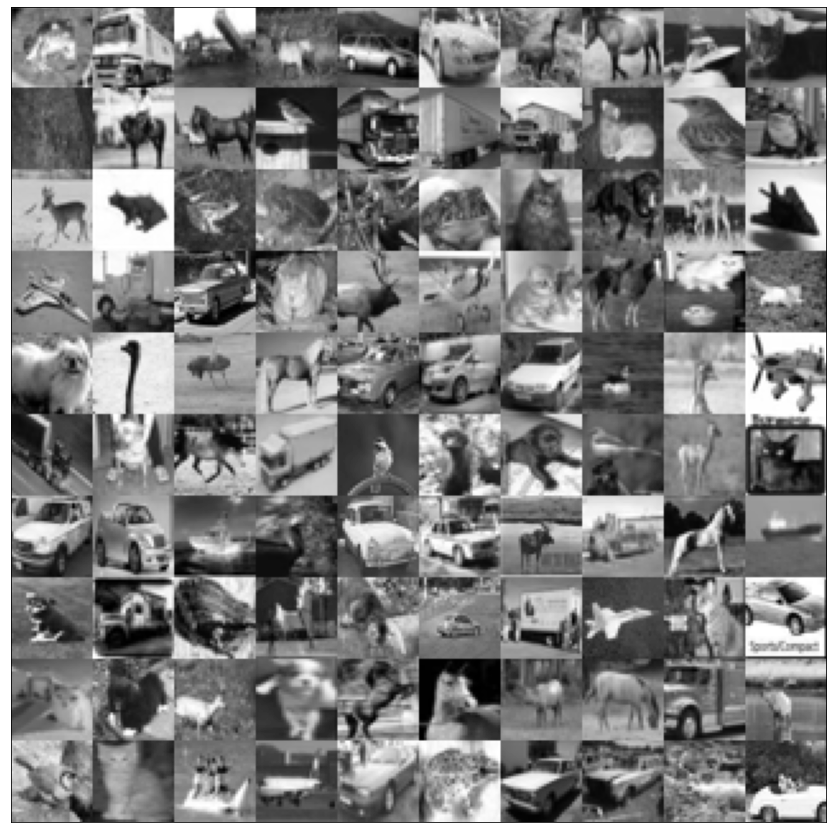

In [5]:
x = data[:, :1024] # rgb -> 1 channel
plot_images(x)

In [6]:
# sort de acordo com os labels
idx = np.argsort(label)
label = np.array(label)
label = label[idx]
data = data[idx]
label, data

(array([0, 0, 0, ..., 9, 9, 9]),
 array([[242, 244, 246, ..., 185, 184, 183],
        [173, 171, 171, ..., 149, 150, 142],
        [167, 161, 159, ..., 177, 183, 196],
        ...,
        [168, 148, 122, ...,  10,   9,  11],
        [195, 204, 212, ...,  28,  27,  27],
        [ 68,  80,  91, ...,  33,  34,  30]], dtype=uint8))

In [7]:
unique, counts = np.unique(label, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 1005,
 1: 974,
 2: 1032,
 3: 1016,
 4: 999,
 5: 937,
 6: 1030,
 7: 1001,
 8: 1025,
 9: 981}

## Selecionando dados para analise

In [8]:
# selecionando apenas parte dos dados
x_cut = np.empty((0, 1024))
label_cut = np.empty((1, 0), dtype=np.uint8)
for i in range(n_class):
    if i > 0:
        start = sum([num_data[j] for j in range(i)])
        end = int(num_data[i] * class_percent) + start
    else:
        start = 0
        end = int(num_data[i] * class_percent)
    label_cut = np.append(label_cut, label[start : end])
    x_cut = np.vstack((x_cut, x[start : end, :]))

unique, counts = np.unique(label_cut, return_counts=True)
num_data_cut = dict(zip(unique, counts))
num_data_cut

{0: 100, 1: 97, 2: 103, 3: 101, 4: 99, 5: 93, 6: 103, 7: 100, 8: 102, 9: 98}

# ARI

In [9]:
manifold = ManifoldHelper(neighbors, dimensions, methods)

In [ ]:
ari_results = manifold.evaluate_all(x_cut, label_cut, n_components=n_class)


2_dimension:
   5_neighbors: 0.00  0.00  0.00  -0.00 
   10_neighbors: -0.00  -0.00  -0.00  0.00 
   25_neighbors: -0.00  0.00  -0.00  -0.00 
   50_neighbors: 0.00  0.00  0.00  0.00 
   75_neighbors: 0.00  -0.00  0.00  -0.00 
   100_neighbors: -0.00  -0.00  -0.00  -0.00 
   150_neighbors: -0.00  -0.00  0.00  -0.00 
   200_neighbors: -0.00  -0.00  0.00  -0.00 
5_dimension:
   5_neighbors: 0.00  0.00  -0.00  0.00 
   10_neighbors: 0.00  0.00  -0.00  0.00 
   25_neighbors: -0.00  0.00  -0.00  0.00 
   50_neighbors: -0.00  0.00  -0.00  0.00 
   75_neighbors: -0.00  -0.00  0.00  0.00 
   100_neighbors: 0.00  0.00  -0.00  0.00 
   150_neighbors: 0.00  -0.00  0.00  0.00 
   200_neighbors: 0.00  -0.00  -0.00 